# TIME SERIES ANALYSIS

# LSTM based Prediction of Electrical Power Connsumption

### Predicting the electrical power consuption of a time series data using different RNN based methods
1. RNN
2. LSTM
3. Bi driectional LSTM
4. GRU

In [1]:
# pip install -q -U keras-tuner

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, GRU
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization

from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout

from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, SimpleRNN

import keras_tuner as kt
import tensorflow as tf

# Importing data

Imorting csv file and making date column as index and converting time from string format to datetime

In [3]:

df=pd.read_csv('Tetuan City power consumption.csv',index_col=0, parse_dates=True, squeeze=True)
print(df.shape)
df.head()

(52416, 8)


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


Sorting the index of dataset

In [4]:
df=df.sort_index()
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
df.tail()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [6]:
# Checking the datatype of index
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [7]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [8]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

# Data Cleaning and preprocessing

#### Resampling data to 1 hour  time frame and taking mean of the feature for that 1 hour

In [9]:
hourly = df.resample('H').mean()

# dropping power consuption columns
hourly=hourly.drop(columns=['Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'])
print(hourly.shape)
hourly.head()

(8736, 5)


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
DateTime,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833


#### making a dataset for power consumption and resampling them to 1 hour based on sum

In [10]:
hourly_pc=df[['Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].resample('H').sum()

print(hourly_pc.shape)
hourly_pc.head()

(8736, 3)


,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,
2017-01-01 00:00:00,175187.84810,108160.48632,115512.28916
2017-01-01 01:00:00,147943.29114,96470.51672,102257.34940
2017-01-01 02:00:00,132498.22784,85984.19453,94056.86747
2017-01-01 03:00:00,124866.83544,79316.71732,89303.13253
2017-01-01 04:00:00,122855.69620,77529.48328,85902.65060


#### Combining the two 1 hour sampled datasets

In [11]:
df_1hr=hourly.copy()

df_1hr['Zone 1 Power Consumption'] = hourly_pc['Zone 1 Power Consumption']

df_1hr.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
DateTime,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,175187.84810
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,147943.29114
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,132498.22784
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,124866.83544
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,122855.69620


In [12]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [13]:
df_1hr.shape

(8736, 6)

In [14]:
df_1hr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Freq: H
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               8736 non-null   float64
 1   Humidity                  8736 non-null   float64
 2   Wind Speed                8736 non-null   float64
 3   general diffuse flows     8736 non-null   float64
 4   diffuse flows             8736 non-null   float64
 5   Zone 1 Power Consumption  8736 non-null   float64
dtypes: float64(6)
memory usage: 477.8 KB


In [15]:
len(df_1hr['Wind Speed'][(48):])


8688

Trend of last 48 hours

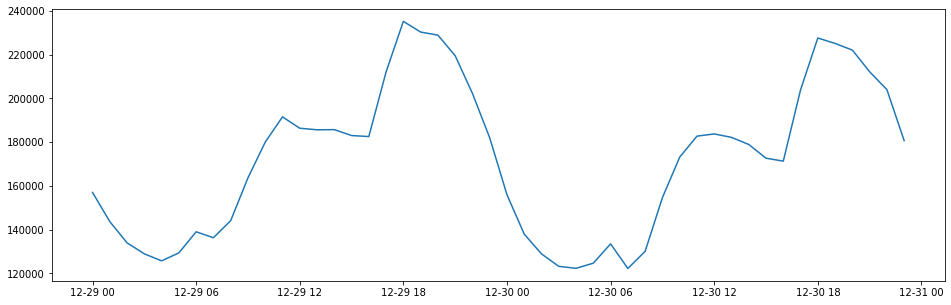

In [16]:
plt.figure(figsize = (16,5))  
plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])

trend of first 48 hours

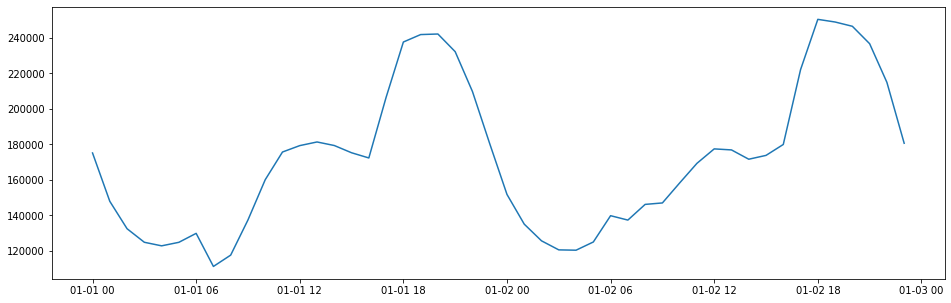

In [17]:
plt.figure(figsize = (16,5))  
plt.plot(df_1hr['Zone 1 Power Consumption'][0:(48)])

In [18]:
data=np.array(df_1hr)

type(data)

numpy.ndarray

 forming dataset into numpy array

In [19]:
data=df_1hr.values

data.shape

(8736, 6)

### #In this dataste we will use the data of all 5 features ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows'] for last 6 hours (t-6) and predict the power consumption current at (t=0)

# Making a sequence for the model to learn and make predictions

In [20]:
# df_s=df_1hr.copy()
# column_list=[]
# data_list=[df_s]


def making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption'):
    
    data_list=[]
    df_s=data


    # for input sequence (t-3,t-2,t-1)

    for i in range(input_timesteps, 0, -1):
    # for i in range(last_hours):
        print(i)
        data_list.append(df_s.shift(i))
        
    # for output sequence (t,t+1)
    # for predicting single output
    for i in range(output_at_time):
        print(i)
        data_list.append(df_s[predicting_coulmn_names].shift(-i))

    df_s=pd.concat(data_list,axis=1)

    print(df_s.shape)
    # df_s.head()
    df_s=df_s.dropna()
    print(df_s.shape)
    df_s.head()
    return(df_s)

In [21]:
df_seq=making_sequence(df_1hr,3)

NumExpr defaulting to 8 threads.


3
2
1
0
(8736, 19)
(8733, 19)


# Scaling and transformation the dataset sequence

In [22]:
def scaling(data):
    values=data.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    print(values.shape)
    return(scaled,scaler)

In [23]:
df_seq=making_sequence(df_1hr,3)

df_seq_scaled,scaler=scaling(df_seq)

3
2
1
0
(8736, 19)
(8733, 19)
(8733, 19)


# Making train - test datastes and X and y

### Making train test datasets

In [24]:

def train_test(data,n_features,n_hours,train_percent,output_at_time):

    # n_features=6
    # n_hours=6
    # n_train_hours = 10 *30 * 24

    train_percent =train_percent/100

    split_percent= round(train_percent * len(data))

    train = data[:split_percent, :]
    print('train',train.shape)
    test = data[split_percent:, :]
    print(test.shape)
    
    
    # split into input and outputs
    n_obs = n_hours * n_features
    trainX, trainy = train[:, :n_obs], train[:, -output_at_time]
    testX, testy = test[:, :n_obs], test[:, -output_at_time]
    print(trainX.shape, len(trainX), trainy.shape)
    # reshape input to be 3D [samples, timesteps, features]
    trainX = trainX.reshape((trainX.shape[0], n_hours, n_features))
    testX = testX.reshape((testX.shape[0], n_hours, n_features))
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return(trainX, trainy,testX, testy)

In [25]:
# making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
df_seq=making_sequence(df_1hr,6)

# scaling(data)
df_seq_scaled,scaler=scaling(df_seq)

# train_test(data,n_features,n_hours,train_percent,output_at_time)
train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

6
5
4
3
2
1
0
(8736, 37)
(8730, 37)
(8730, 37)
train (6984, 37)
(1746, 37)
(6984, 36) 6984 (6984,)
(6984, 6, 6) (6984,) (1746, 6, 6) (1746,)


# Building Models

### Making model for LSTM

In [26]:

def model_LSTM(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Model of RNN

In [27]:

def model_RNN(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Making GRU model

In [28]:

def model_GRU(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(GRU (50, dropout=0.5, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(GRU (75, dropout=0.5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Bidirectional LSTM

In [29]:

def model_Bidirectional(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    
    model.add(Bidirectional(LSTM(50, return_sequences=True),
                             input_shape=(train_X.shape[1], train_X.shape[2])))
    
    # model.add(Bidirectional(LSTM(50,return_sequences=True, dropout=0.5, input_shape=(train_X.shape[1], train_X.shape[2]))))
    # model.add(Bidirectional(LSTM (50, dropout=0.5, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]))))
    model.add(Bidirectional(LSTM (75, dropout=0.5)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Model of RNN with attention layer

In [30]:
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [31]:

def model_RNN_attention(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
        
    x=Input(shape=(train_X.shape[1], train_X.shape[2]))
    RNN_layer = SimpleRNN(50, return_sequences=True, activation='tanh')(x)
    
    
    attention_layer = attention()(RNN_layer)
    
    outputs=Dense(1, trainable=True, activation='tanh')(attention_layer)
    model=Model(x,outputs)
    # model.compile(loss='mse', optimizer='adam')
    
    # model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Model 2 of LSTM

In [32]:

def model_LSTM_2(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    
    model.add(LSTM(128, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(25))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)




### Making Evaluation function

In [33]:
df_evalutions=pd.DataFrame(columns=['model_name','train_rmse','test_rmse','train_r2','test_r2'])

In [34]:


def prediction_evaluation(model,model_name,n_hours=6,n_features=6,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
   
    ## For train data

    # make a prediction
    yhat_train = model.predict(train_X)
    print(yhat_train.shape)
    train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
    print(train_X.shape)
    inv_yhat_train = np.concatenate((train_X,yhat_train), axis=1)
    inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
    inv_yhat_train = inv_yhat_train[:,-1]

    # invert scaling for actual
    train_y = train_y.reshape((len(train_y), 1))

    # inv_y_train = np.concatenate(( train_X[:, -5:],train_y), axis=1)
    inv_y_train = np.concatenate(( train_X,train_y), axis=1)

    inv_y_train = scaler.inverse_transform(inv_y_train)
    # inv_y_train = inv_y[:,0]

    inv_y_train = inv_y_train[:,-1]
    # calculate RMSE
    rmse_train = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
    print('Train RMSE: %.3f' % rmse_train)
    
    r2_train= r2_score(inv_y_train, inv_yhat_train)
    print('Train R2: %.3f' % r2_train)
    
    
    ## For test data

    # make a prediction
    yhat_test = model.predict(test_X)
    print(yhat_test.shape)
    test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
    print(test_X.shape)
    inv_yhat_test = np.concatenate((test_X,yhat_test), axis=1)
    inv_yhat_test = scaler.inverse_transform(inv_yhat_test)
    inv_yhat_test = inv_yhat_test[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))

    # inv_y_train = np.concatenate(( test_X[:, -5:],test_y), axis=1)
    inv_y_test = np.concatenate(( test_X,test_y), axis=1)

    inv_y_test = scaler.inverse_transform(inv_y_test)
    # inv_y_train = inv_y[:,0]

    inv_y_test = inv_y_test[:,-1]
    # calculate RMSE
    
    rmse_test = sqrt(mean_squared_error(inv_y_test, inv_yhat_test))
    
    print('Test RMSE: %.3f' % rmse_test)
    
    
    
    r2_test= r2_score(inv_y_test, inv_yhat_test)
    print('Test R2: %.3f' % r2_test)
    
    
    global df_evalutions
    df_evalutions=df_evalutions.append({'model_name':model_name,'train_rmse': rmse_train,'test_rmse': rmse_test,
                                        'train_r2': r2_train,'test_r2': r2_test},ignore_index=True)
    
    return(inv_yhat_train,rmse_train,r2_train,inv_yhat_test,rmse_test,r2_test,inv_y_train,inv_y_test)

# Applying the build models

## Applying LSTM models

6
5
4
3
2
1
0
(8736, 37)
(8730, 37)
(8730, 37)
train (6984, 37)
(1746, 37)
(6984, 36) 6984 (6984,)
(6984, 6, 6) (6984,) (1746, 6, 6) (1746,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                11400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 1s - loss: 0.0204 - val_loss: 0.0124
Epoch 2/25
194/194 - 1s - loss: 0.0103 - val_loss: 0.0081
Epoch 3/25
194/194 - 1s - loss: 0.0070 - val_loss: 0.0054
Epoch 4/25
194/194 - 1s - loss: 0.0056 - val_loss: 0.0042
Epoch 5/25
194/194 - 0s - loss: 0.0048 - val_loss: 0.0036
Epoch 6/25
194/194 - 1s - loss: 0.0041 - val_loss: 0.0032
Epoch 7/25
194/194 - 1s -

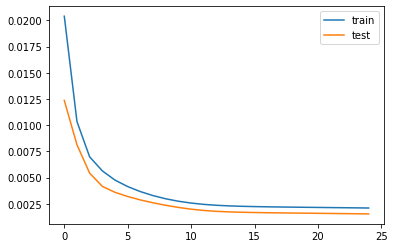

(6984, 1)
(6984, 36)
Train RMSE: 12718.626
Train R2: 0.911
(1746, 1)
(1746, 36)
Test RMSE: 8815.783
Test R2: 0.942


In [35]:
# making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
df_seq=making_sequence(df_1hr,6)

# scaling(data)
df_seq_scaled,scaler=scaling(df_seq)

# train_test(data,n_features,n_hours,train_percent,output_at_time)
train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_LSTM(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
# hist_LSTM, model_LSTM = model_LSTM(36,25)

hist_LSTM1, model_LSTM1 = model_LSTM(36,25)

# prediction_evaluation(n_hours=6,n_features=6,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
y_pred_train_LSTM1,rmse_train_LSTM1,r2_train_LSTM1,y_pred_test_LSTM1,rmse_test_LSTM1,r2_test_LSTM1,y_train_LSTM1,y_test_LSTM1=prediction_evaluation(model_LSTM1,'LSTM-1')



In [36]:
df_evalutions

,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,12718.626092,8815.783281,0.911004,0.942122


## Applying LSTM model-2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 128)            69120     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1625      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25)               

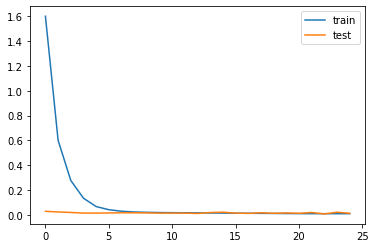

(6984, 1)
(6984, 36)
Train RMSE: 21837.082
Train R2: 0.738
(1746, 1)
(1746, 36)
Test RMSE: 23964.354
Test R2: 0.572


In [37]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_LSTM2(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_LSTM2, model_LSTM2 = model_LSTM_2(36,25)

# prediction_evaluation(n_hours=6,n_features=6,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_LSTM2,rmse_train_LSTM2,r2_train_LSTM2,y_pred_test_LSTM2,rmse_test_LSTM2,r2_test_LSTM2,y_train_LSTM2,y_test_LSTM2=prediction_evaluation(model_LSTM2,'LSTM-2')


## Applying RNN

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2850      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 0s - loss: 0.0256 - val_loss: 0.0093
Epoch 2/25
194/194 - 0s - loss: 0.0076 - val_loss: 0.0079
Epoch 3/25
194/194 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 4/25
194/194 - 0s - loss: 0.0043 - val_loss: 0.0048
Epoch 5/25
194/194 - 0s - loss: 0.0036 - val_loss: 0.0041
Epoch 6/25
194/194 - 0s - loss: 0.0032 - val_loss: 0.0037
Epoch 7/25
194/194 - 0s - loss: 0.0029 - val_loss: 0.0034
Epoch 8/25
194/194 - 0s - loss: 0.0027 - val_loss: 0.0031
Epoch 9/25
194/194 - 0s - loss: 0.0026 - val_loss:

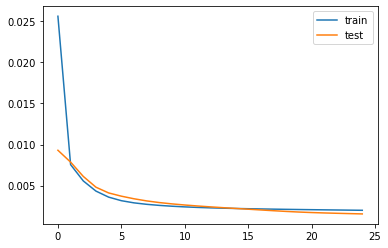

(6984, 1)
(6984, 36)
Train RMSE: 13899.034
Train R2: 0.894
(1746, 1)
(1746, 36)
Test RMSE: 8889.683
Test R2: 0.941


In [38]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_RNN(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_RNN, model_RNN = model_RNN(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_RNN,rmse_train_RNN,r2_train_RNN,y_pred_test_RNN,rmse_test_RNN,r2_test_RNN,y_train_RNN,y_test_RNN=prediction_evaluation(model_RNN,'RNN')

## Applying GRU

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 6, 50)             8700      
_________________________________________________________________
gru_1 (GRU)                  (None, 75)                28575     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 76        
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 1s - loss: 0.0279 - val_loss: 0.0170
Epoch 2/25
194/194 - 1s - loss: 0.0185 - val_loss: 0.0117
Epoch 3/25
194/194 - 1s - loss: 0.0151 - val_loss: 0.0124
Epoch 4/25
194/194 - 1s - loss: 0.0139 - val_loss: 0.0121
Epoch 5/25
194/194 - 1s - loss: 0.0134 - val_loss: 0.0106
Epoch 6/25
194/194 - 1s - loss: 0.0127 - val_loss: 0.0109
Epoch 7/25
194/194 - 1s - loss: 

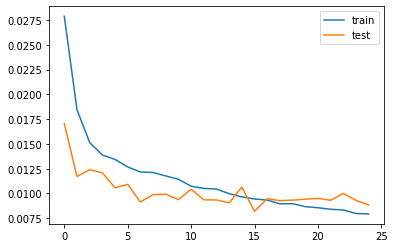

(6984, 1)
(6984, 36)
Train RMSE: 26598.948
Train R2: 0.611
(1746, 1)
(1746, 36)
Test RMSE: 21178.893
Test R2: 0.666


In [39]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_GRU(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_GRU, model_GRU = model_GRU(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_GRU,rmse_train_GRU,r2_train_GRU,y_pred_test_GRU,rmse_test_GRU,r2_test_GRU,y_train_GRU,y_test_GRU=prediction_evaluation(model_GRU,'GRU')

## Applying Bidirectional LSTM

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 6, 100)            22800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150)               105600    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 151       
Total params: 128,551
Trainable params: 128,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 3s - loss: 0.0159 - val_loss: 0.0088
Epoch 2/25
194/194 - 1s - loss: 0.0082 - val_loss: 0.0064
Epoch 3/25
194/194 - 1s - loss: 0.0065 - val_loss: 0.0056
Epoch 4/25
194/194 - 1s - loss: 0.0056 - val_loss: 0.0049
Epoch 5/25
194/194 - 1s - loss: 0.0054 - val_loss: 0.0052
Epoch 6/25
194/194 - 1s - loss: 0.0050 - val_loss: 0.0044
Epoch 7/25
194/194 - 1s - loss

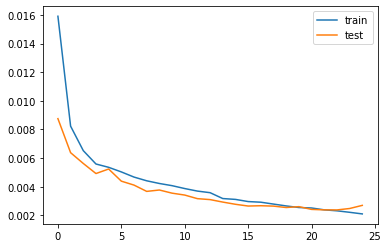

(6984, 1)
(6984, 36)
Train RMSE: 13637.581
Train R2: 0.898
(1746, 1)
(1746, 36)
Test RMSE: 11697.141
Test R2: 0.898


In [40]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_Bidirectional(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_Bidirectional, model_Bidirectional = model_Bidirectional(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_Bidirectional,rmse_train_Bidirectional,r2_train_Bidirectional,y_pred_test_Bidirectional,rmse_test_Bidirectional,r2_test_Bidirectional,y_train_Bidirestional,y_test_Bidirestional=prediction_evaluation(model_Bidirectional,'Bidirectional')

## Applying RNN attention model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 6)]            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 6, 50)             2850      
_________________________________________________________________
attention (attention)        (None, 50)                56        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 2,957
Trainable params: 2,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 0s - loss: 0.0463 - val_loss: 0.0151
Epoch 2/25
194/194 - 0s - loss: 0.0170 - val_loss: 0.0159
Epoch 3/25
194/194 - 0s - loss: 0.0135 - val_loss: 0.0110
Epoch 4/25
194/194 - 0s - loss: 0.0100 - val_loss: 0.0080
Epoch 5/25
194/194 - 0s -

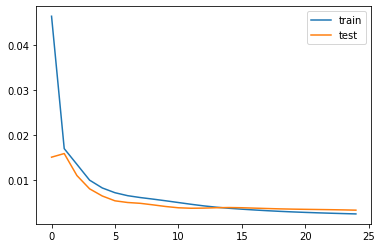

(6984, 1)
(6984, 36)
Train RMSE: 19066.777
Train R2: 0.800
(1746, 1)
(1746, 36)
Test RMSE: 12948.526
Test R2: 0.875


In [41]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_RNN_attention(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_RNN_attention, model_RNN_attention = model_RNN_attention(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_RNN_attention,rmse_train_RNN_attention,r2_train_RNN_attention,y_pred_test_RNN_attention,rmse_test_RNN_attention,r2_test_RNN_attention,y_train_RNN_attention,y_test_RNN_attention=prediction_evaluation(model_RNN_attention,'RNN_attention')

In [42]:
df_evalutions 

,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,12718.626092,8815.783281,0.911004,0.942122
1,LSTM-2,21837.082136,23964.354432,0.737650,0.572316
2,RNN,13899.034281,8889.683380,0.893718,0.941148
3,GRU,26598.947824,21178.892596,0.610757,0.665960
4,Bidirectional,13637.581002,11697.141025,0.897679,0.898105
5,RNN_attention,19066.776928,12948.526253,0.799992,0.875137


# Finding optimal values of all hyperparameters using Keras Tuner

### Optimal hyperparameter values for RNN

In [43]:
def model_builder_RNN(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=10, max_value=120, step=20)
    model.add(SimpleRNN(units=hp_units, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3])
    
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=opt)

    model.summary()
    
    return model

tuner = kt.Hyperband(model_builder_RNN,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='RNN',
                     project_name='opt_hyp_RNN')


tuner.search(train_X, train_y, epochs=25, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)

best_hps_RNN=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_RNN.get('units')} and the optimal learning rate for the optimizer
is {best_hps_RNN.get('learning_rate')}.
""")

units_RNN=best_hps_RNN.get('units')
learning_rate_RNN=best_hps_RNN.get('learning_rate')


Reloading Oracle from existing project RNN\opt_hyp_RNN\oracle.json
Reloading Tuner from RNN\opt_hyp_RNN\tuner0.json
Oracle triggered exit


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                170       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 50 and the optimal learning rate for the optimizer
is 0.01.



### Optimal hyperparameter values for LSTM

In [44]:
def model_builder_LSTM(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=10, max_value=120, step=20)
    model.add(LSTM(units=hp_units, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3])
    
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=opt)

    model.summary()
    
    return model



tuner = kt.Hyperband(model_builder_LSTM,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='LSTM',
                     project_name='opt_hyp_LSTM')


tuner.search(train_X, train_y, epochs=25, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)

best_hps_LSTM=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_LSTM.get('units')} and the optimal learning rate for the optimizer
is {best_hps_LSTM.get('learning_rate')}.
""")

units_LSTM=best_hps_LSTM.get('units')
learning_rate_LSTM=best_hps_LSTM.get('learning_rate')


Reloading Oracle from existing project LSTM\opt_hyp_LSTM\oracle.json
Reloading Tuner from LSTM\opt_hyp_LSTM\tuner0.json
Oracle triggered exit


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                680       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 50 and the optimal learning rate for the optimizer
is 0.01.



### Optimal hyperparameter values for GRU

In [45]:
def model_builder_GRU(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=10, max_value=120, step=20)
    
    model.add(GRU (units=hp_units, dropout=0.5, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))
    
    hp_units2 = hp.Int('units', min_value=10, max_value=120, step=20)
    
    
    model.add(GRU (units=hp_units2, dropout=0.5))
    
    model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3])
    
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=opt)

    model.summary()
    
    return model





tuner = kt.Hyperband(model_builder_GRU,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='GRU',
                     project_name='opt_hyp_GRU')


tuner.search(train_X, train_y, epochs=25, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)

best_hps_GRU=tuner.get_best_hyperparameters(num_trials=1)[0]

print(tuner.get_best_hyperparameters(num_trials=1))


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_GRU.get('units')} and the optimal learning rate for the optimizer
is {best_hps_GRU.get('learning_rate')}.
""")

units_GRU=best_hps_GRU.get('units')
learning_rate_GRU=best_hps_GRU.get('learning_rate')


Reloading Oracle from existing project GRU\opt_hyp_GRU\oracle.json
Reloading Tuner from GRU\opt_hyp_GRU\tuner0.json
Oracle triggered exit


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 6, 10)             540       
_________________________________________________________________
gru_3 (GRU)                  (None, 10)                660       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 90 and the optimal learning rate for the optimizer
is 0.001.



# Applying Optimal Paramters on our models

### Making model for LSTM with optimal parameters

In [46]:

def model_LSTM_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(LSTM(units=units_LSTM, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_LSTM)
    model.compile(loss='mean_squared_error', optimizer=opt)
    
    # model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Model of RNN with optimal Parameters

In [47]:

def model_RNN_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(SimpleRNN(units=units_RNN, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_RNN)
    model.compile(loss='mean_squared_error', optimizer=opt)
    
    # model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Making GRU model with optimal paramaters

In [48]:

def model_GRU_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    model.add(GRU (units=units_GRU, dropout=0.5, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(GRU (units=units_GRU, dropout=0.5))
    model.add(Dense(1))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_GRU)
    model.compile(loss='mean_squared_error', optimizer=opt)
    
    # model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Bidirectional LSTM with optimal parameters

In [49]:

def model_Bidirectional_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    model = Sequential()
    
    model.add(Bidirectional(LSTM(units=units_LSTM, return_sequences=True),
                             input_shape=(train_X.shape[1], train_X.shape[2])))
    
    # model.add(Bidirectional(LSTM(50,return_sequences=True, dropout=0.5, input_shape=(train_X.shape[1], train_X.shape[2]))))
    # model.add(Bidirectional(LSTM (50, dropout=0.5, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]))))
    model.add(Bidirectional(LSTM (units_LSTM, dropout=0.5)))
    model.add(Dense(1))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_LSTM)
    model.compile(loss='mean_squared_error', optimizer=opt)
    
    # model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

### Model of RNN with attention layer and optimal paramters

In [50]:
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [51]:

def model_RNN_attention_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y):
    
    # design network
    # model = Sequential()
    # RNN_layer=model.add(SimpleRNN(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    
    x=Input(shape=(train_X.shape[1], train_X.shape[2]))
    RNN_layer = SimpleRNN(units=units_RNN, return_sequences=True, activation='tanh')(x)
    
    
    attention_layer = attention()(RNN_layer)
    
    outputs=Dense(1, trainable=True, activation='tanh')(attention_layer)
    model=Model(x,outputs)
    # model.compile(loss='mse', optimizer='adam')
    
    # model.add(Dense(1))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_RNN)
    model.compile(loss='mean_squared_error', optimizer=opt)
    
    # model.compile(loss='mean_squared_error', optimizer=optimizer)

    model.summary()
    # fit network
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')

    plt.legend()
    plt.show()
    return(history,model)

## Applying LSTM models with optimal paramters

6
5
4
3
2
1
0
(8736, 37)
(8730, 37)
(8730, 37)
train (6984, 37)
(1746, 37)
(6984, 36) 6984 (6984,)
(6984, 6, 6) (6984,) (1746, 6, 6) (1746,)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                11400     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 1s - loss: 0.0140 - val_loss: 0.0048
Epoch 2/25
194/194 - 0s - loss: 0.0034 - val_loss: 0.0025
Epoch 3/25
194/194 - 0s - loss: 0.0026 - val_loss: 0.0021
Epoch 4/25
194/194 - 1s - loss: 0.0024 - val_loss: 0.0019
Epoch 5/25
194/194 - 1s - loss: 0.0024 - val_loss: 0.0019
Epoch 6/25
194/194 - 1s - loss: 0.0024 - val_loss: 0.0018
Epoch 7/25
194/194 - 1s

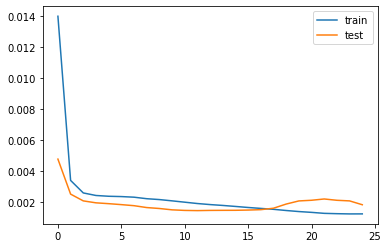

(6984, 1)
(6984, 36)
Train RMSE: 9550.455
Train R2: 0.950
(1746, 1)
(1746, 36)
Test RMSE: 9614.159
Test R2: 0.931


In [52]:
# making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
df_seq=making_sequence(df_1hr,6)

# scaling(data)
df_seq_scaled,scaler=scaling(df_seq)

# train_test(data,n_features,n_hours,train_percent,output_at_time)
train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_LSTM_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
# hist_LSTM_optimal, model_LSTM_optimal = model_LSTM_optimal(36,25)

hist_LSTM_optimal1, model_LSTM_optimal1 = model_LSTM_optimal(36,25)

# prediction_evaluation(n_hours=6,n_features=6,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
y_pred_train_LSTM_optimal1,rmse_train_LSTM_optimal1,r2_train_LSTM_optimal1,y_pred_test_LSTM_optimal1,rmse_test_LSTM_optimal1,r2_test_LSTM_optimal1,y_train_LSTM1_optimal,y_test_LSTM1_optimal=prediction_evaluation(model_LSTM_optimal1,'LSTM_optimal-1')

In [53]:
df_evalutions

,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,12718.626092,8815.783281,0.911004,0.942122
1,LSTM-2,21837.082136,23964.354432,0.737650,0.572316
2,RNN,13899.034281,8889.683380,0.893718,0.941148
3,GRU,26598.947824,21178.892596,0.610757,0.665960
4,Bidirectional,13637.581002,11697.141025,0.897679,0.898105
5,RNN_attention,19066.776928,12948.526253,0.799992,0.875137
6,LSTM_optimal-1,9550.455124,9614.158564,0.949819,0.931164


## Applying RNN with optimal parameters

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 50)                2850      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 0s - loss: 0.0432 - val_loss: 0.0043
Epoch 2/25
194/194 - 0s - loss: 0.0053 - val_loss: 0.0027
Epoch 3/25
194/194 - 0s - loss: 0.0037 - val_loss: 0.0022
Epoch 4/25
194/194 - 0s - loss: 0.0033 - val_loss: 0.0019
Epoch 5/25
194/194 - 0s - loss: 0.0028 - val_loss: 0.0017
Epoch 6/25
194/194 - 0s - loss: 0.0026 - val_loss: 0.0017
Epoch 7/25
194/194 - 0s - loss: 0.0025 - val_loss: 0.0018
Epoch 8/25
194/194 - 0s - loss: 0.0024 - val_loss: 0.0019
Epoch 9/25
194/194 - 0s - loss: 0.0024 - val_loss:

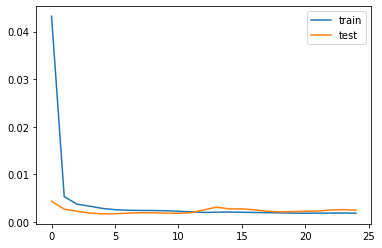

(6984, 1)
(6984, 36)
Train RMSE: 11563.663
Train R2: 0.926
(1746, 1)
(1746, 36)
Test RMSE: 11192.081
Test R2: 0.907


In [54]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_RNN_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_RNN_optimal, model_RNN_optimal = model_RNN_optimal(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_RNN_optimal,rmse_train_RNN_optimal,r2_train_RNN_optimal,y_pred_test_RNN_optimal,rmse_test_RNN_optimal,r2_test_RNN_optimal,y_train_RNN_optimal,y_test_RNN_optimal=prediction_evaluation(model_RNN_optimal,'RNN_optimal')

## Applying GRU with optimal paramters

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 6, 90)             26460     
_________________________________________________________________
gru_5 (GRU)                  (None, 90)                49140     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 91        
Total params: 75,691
Trainable params: 75,691
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 2s - loss: 0.0264 - val_loss: 0.0207
Epoch 2/25
194/194 - 1s - loss: 0.0176 - val_loss: 0.0162
Epoch 3/25
194/194 - 1s - loss: 0.0149 - val_loss: 0.0119
Epoch 4/25
194/194 - 1s - loss: 0.0141 - val_loss: 0.0130
Epoch 5/25
194/194 - 1s - loss: 0.0130 - val_loss: 0.0130
Epoch 6/25
194/194 - 1s - loss: 0.0125 - val_loss: 0.0105
Epoch 7/25
194/194 - 1s - loss:

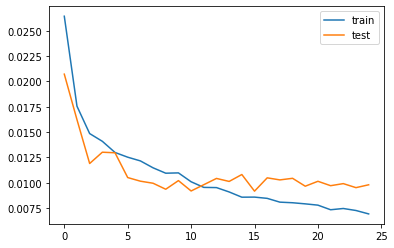

(6984, 1)
(6984, 36)
Train RMSE: 30188.200
Train R2: 0.499
(1746, 1)
(1746, 36)
Test RMSE: 22275.472
Test R2: 0.630


In [55]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_GRU_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_GRU_optimal, model_GRU_optimal = model_GRU_optimal(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_GRU_optimal,rmse_train_GRU_optimal,r2_train_GRU_optimal,y_pred_test_GRU_optimal,rmse_test_GRU_optimal,r2_test_GRU_optimal,y_train_GRU_optimal,y_test_GRU_optimal=prediction_evaluation(model_GRU_optimal,'GRU_optimal')

## Applying Bidirectional LSTM with optimal paramters

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 6, 100)            22800     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 83,301
Trainable params: 83,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 2s - loss: 0.0202 - val_loss: 0.0069
Epoch 2/25
194/194 - 1s - loss: 0.0066 - val_loss: 0.0064
Epoch 3/25
194/194 - 1s - loss: 0.0057 - val_loss: 0.0058
Epoch 4/25
194/194 - 1s - loss: 0.0048 - val_loss: 0.0053
Epoch 5/25
194/194 - 1s - loss: 0.0043 - val_loss: 0.0042
Epoch 6/25
194/194 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 7/25
194/194 - 1s - loss:

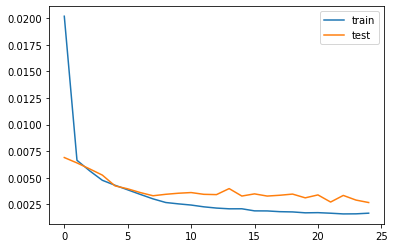

(6984, 1)
(6984, 36)
Train RMSE: 14282.133
Train R2: 0.888
(1746, 1)
(1746, 36)
Test RMSE: 11641.173
Test R2: 0.899


In [56]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_Bidirectional_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_Bidirectional_optimal, model_Bidirectional_optimal = model_Bidirectional_optimal(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_Bidirectional_optimal,rmse_train_Bidirectional_optimal,r2_train_Bidirectional_optimal,y_pred_test_Bidirectional_optimal,rmse_test_Bidirectional_optimal,r2_test_Bidirectional_optimal,y_train_Bidirection_optimal,y_test_Bidirection_optimal=prediction_evaluation(model_Bidirectional_optimal,'Bidirectional_optimal')

## Applying RNN attention model with optimal

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6, 6)]            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 6, 50)             2850      
_________________________________________________________________
attention_1 (attention)      (None, 50)                56        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 2,957
Trainable params: 2,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
194/194 - 1s - loss: 0.0130 - val_loss: 0.0075
Epoch 2/25
194/194 - 0s - loss: 0.0066 - val_loss: 0.0072
Epoch 3/25
194/194 - 0s - loss: 0.0048 - val_loss: 0.0058
Epoch 4/25
194/194 - 0s - loss: 0.0041 - val_loss: 0.0050
Epoch 5/25
194/194 - 0s

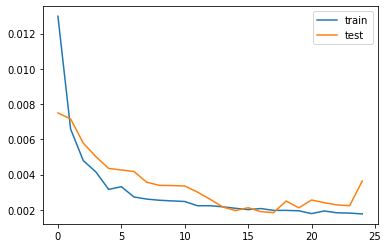

(6984, 1)
(6984, 36)
Train RMSE: 12262.329
Train R2: 0.917
(1746, 1)
(1746, 36)
Test RMSE: 13576.190
Test R2: 0.863


In [57]:
# # making_sequence(data,input_timesteps,output_at_time=1,predicting_coulmn_names='Zone 1 Power Consumption')
# df_seq=making_sequence(df_1hr,6)

# # scaling(data)
# df_seq_scaled,scaler=scaling(df_seq)

# # train_test(data,n_features,n_hours,train_percent,output_at_time)
# train_X, train_y, test_X, test_y = train_test(df_seq_scaled,6,6,80,1)

# model_RNN_attention_optimal(batch_size,epoch, optimizer='adam',train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
hist_RNN_attention_optimal, model_RNN_attention_optimal = model_RNN_attention_optimal(36,25)

# prediction_evaluation(n_hours=6,n_features=6,,train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y))
y_pred_train_RNN_attention_optimal,rmse_train_RNN_attention_optimal,r2_train_RNN_attention_optimal,y_pred_test_RNN_attention_optimal,rmse_test_RNN_attention_optimal,r2_test_RNN_attention_optimal,y_train_RNN_attention_optimal,y_test_RNN_attention_optimal=prediction_evaluation(model_RNN_attention_optimal,'RNN_attention_optimal')

# Reuslts of all models

In [58]:
df_evalutions 

,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,12718.626092,8815.783281,0.911004,0.942122
1,LSTM-2,21837.082136,23964.354432,0.737650,0.572316
2,RNN,13899.034281,8889.683380,0.893718,0.941148
3,GRU,26598.947824,21178.892596,0.610757,0.665960
4,Bidirectional,13637.581002,11697.141025,0.897679,0.898105
...,...,...,...,...,...
6,LSTM_optimal-1,9550.455124,9614.158564,0.949819,0.931164
7,RNN_optimal,11563.662590,11192.080818,0.926433,0.906715
8,GRU_optimal,30188.199937,22275.472141,0.498621,0.630474
9,Bidirectional_optimal,14282.132682,11641.173110,0.887778,0.899078


In [89]:
df_evalutions.to_csv('df_evalutions.csv',index=False)

In [60]:
df_results_total=df_evalutions.sort_values('test_r2',ascending=False)
df_results_total



,model_name,train_rmse,test_rmse,train_r2,test_r2
0,LSTM-1,12718.626092,8815.783281,0.911004,0.942122
2,RNN,13899.034281,8889.683380,0.893718,0.941148
6,LSTM_optimal-1,9550.455124,9614.158564,0.949819,0.931164
7,RNN_optimal,11563.662590,11192.080818,0.926433,0.906715
9,Bidirectional_optimal,14282.132682,11641.173110,0.887778,0.899078
...,...,...,...,...,...
5,RNN_attention,19066.776928,12948.526253,0.799992,0.875137
10,RNN_attention_optimal,12262.329431,13576.189571,0.917275,0.862739
3,GRU,26598.947824,21178.892596,0.610757,0.665960
8,GRU_optimal,30188.199937,22275.472141,0.498621,0.630474


In [61]:
df_train_results=df_evalutions.copy()

df_train_results=df_train_results.drop(columns=['test_rmse','test_r2'])

df_train_results=df_train_results.sort_values('train_r2',ascending=False)

df_train_results

,model_name,train_rmse,train_r2
6,LSTM_optimal-1,9550.455124,0.949819
7,RNN_optimal,11563.662590,0.926433
10,RNN_attention_optimal,12262.329431,0.917275
0,LSTM-1,12718.626092,0.911004
4,Bidirectional,13637.581002,0.897679
...,...,...,...
9,Bidirectional_optimal,14282.132682,0.887778
5,RNN_attention,19066.776928,0.799992
1,LSTM-2,21837.082136,0.737650
3,GRU,26598.947824,0.610757


In [62]:
df_test_results=df_evalutions.copy()

df_test_results=df_test_results.drop(columns=['train_rmse','train_r2'])

df_test_results=df_test_results.sort_values('test_r2',ascending=False)

df_test_results

,model_name,test_rmse,test_r2
0,LSTM-1,8815.783281,0.942122
2,RNN,8889.683380,0.941148
6,LSTM_optimal-1,9614.158564,0.931164
7,RNN_optimal,11192.080818,0.906715
9,Bidirectional_optimal,11641.173110,0.899078
...,...,...,...
5,RNN_attention,12948.526253,0.875137
10,RNN_attention_optimal,13576.189571,0.862739
3,GRU,21178.892596,0.665960
8,GRU_optimal,22275.472141,0.630474


In [63]:
df_results_total.to_csv('df_results_total.csv',index=False)

df_test_results.to_csv('df_test_results.csv',index=False)

df_train_results.to_csv('df_train_results.csv',index=False)

# Plots

## Plots of models without optimal Parameters

### LSTM1-1 model without optimal paramters

(0.0, 50.0)

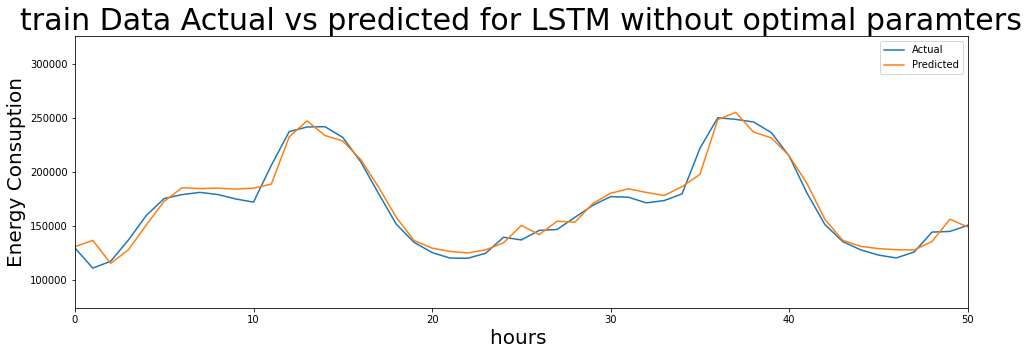

In [64]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_LSTM1,label="Actual")
plt.plot(y_pred_train_LSTM1,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for LSTM1 model without optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

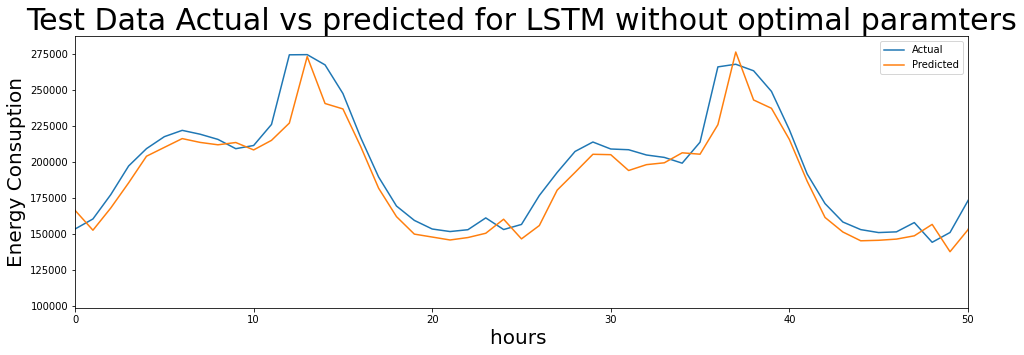

In [65]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_LSTM1,label="Actual")
plt.plot(y_pred_test_LSTM1,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for LSTM1 model without optimal parameters on test data the Predicted results are not smooth and have a little fluctaions

### RNN model without optimal paramters

(0.0, 50.0)

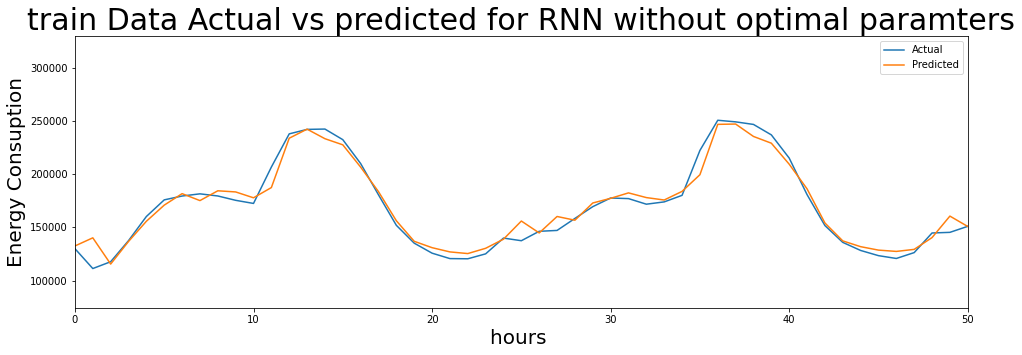

In [66]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN,label="Actual")
plt.plot(y_pred_train_RNN,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model without optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

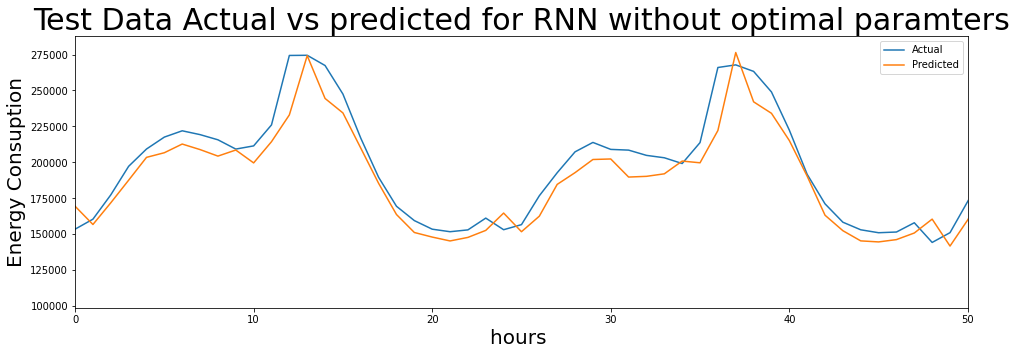

In [67]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN,label="Actual")
plt.plot(y_pred_test_RNN,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model without optimal parameters on test data the Predicted results are not smooth and have a some differnce

### GRU model without optimal paramters

(0.0, 50.0)

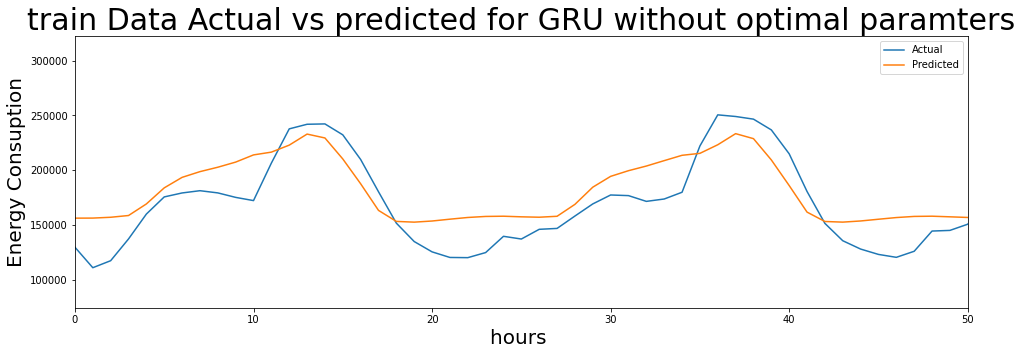

In [68]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_GRU,label="Actual")
plt.plot(y_pred_train_GRU,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for GRU without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for GRU model without optimal parameters on train data the Predicted results are not smooth and have a lot of deviations errors

(0.0, 50.0)

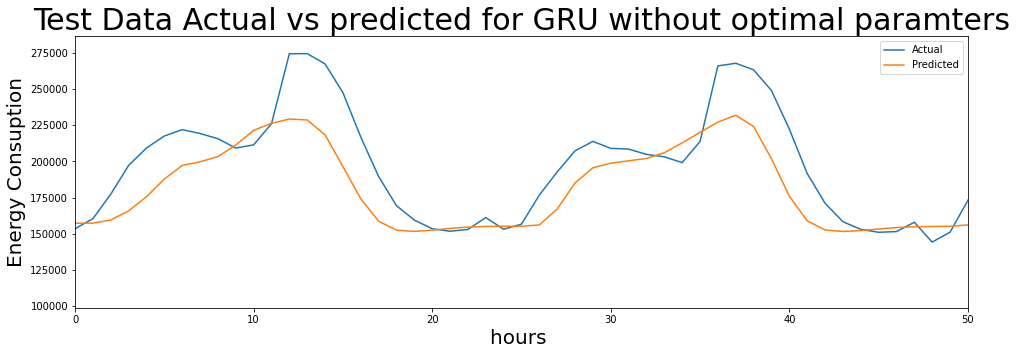

In [69]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_GRU,label="Actual")
plt.plot(y_pred_test_GRU,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for GRU without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for GRU model without optimal parameters on test data the Predicted results major difference

### Biderectional LSTM model without optimal paramters

(0.0, 50.0)

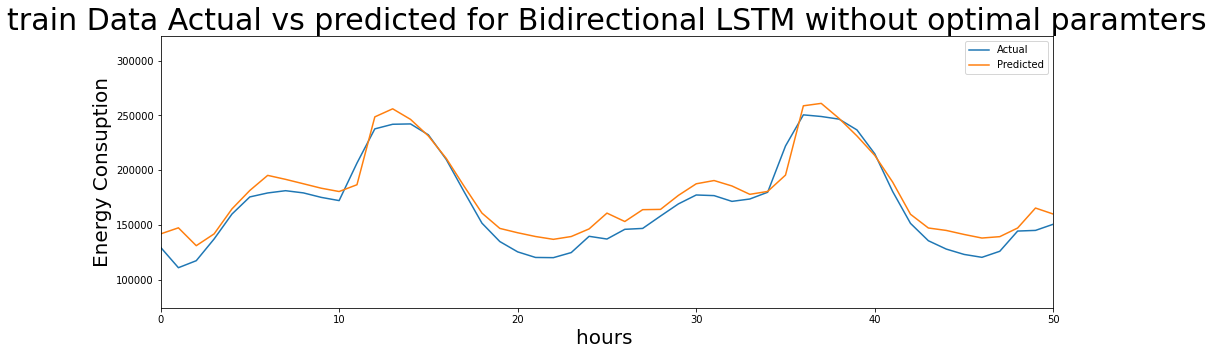

In [70]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_Bidirestional,label="Actual")
plt.plot(y_pred_train_Bidirectional,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for Bidirectional LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for Biderctiona LSTM1 model without optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

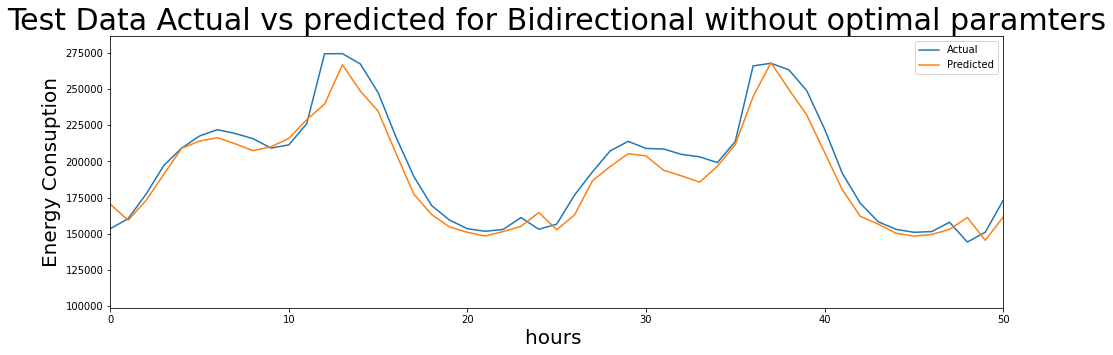

In [71]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_Bidirestional,label="Actual")
plt.plot(y_pred_test_Bidirectional,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for Bidirectional without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for this model without optimal parameters on test data the Predicted results are not smooth and have a little fluctaions

### RNN model with attention layer and without optimal paramters

(0.0, 50.0)

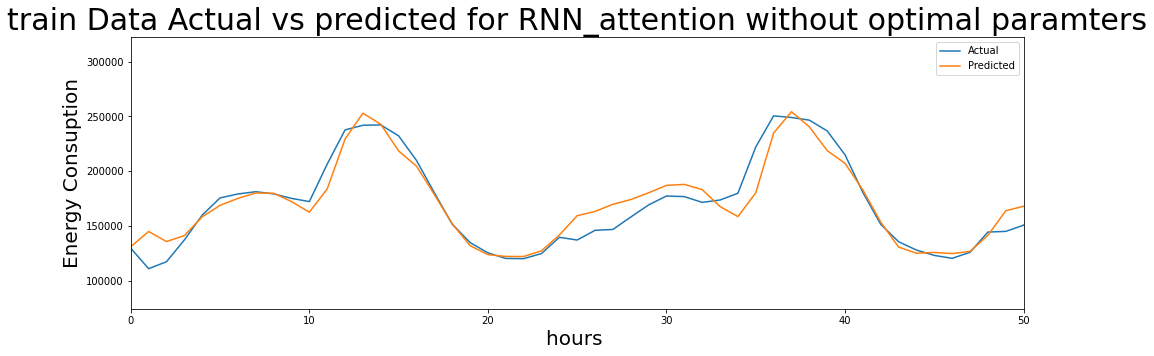

In [72]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN_attention,label="Actual")
plt.plot(y_pred_train_RNN_attention,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN_attention without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model with attention layer without optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

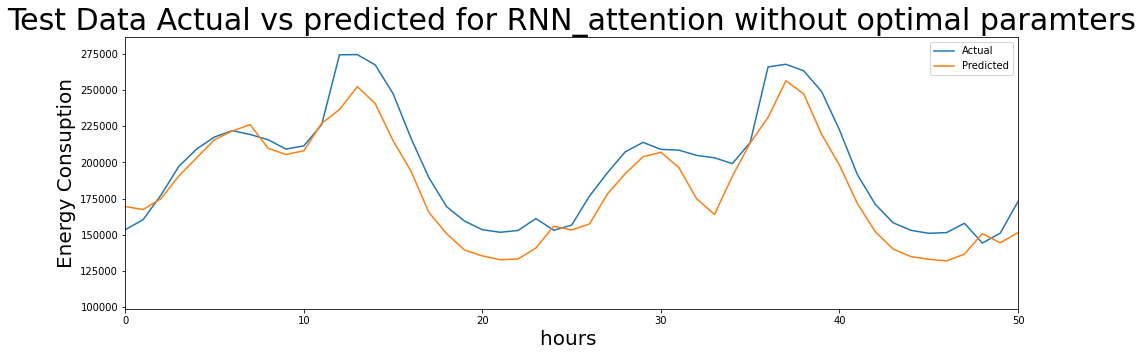

In [73]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN_attention,label="Actual")
plt.plot(y_pred_test_RNN_attention,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN_attention without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN_attention model without optimal parameters on test data the Predicted results are not smooth and have a some differnce

## Plots of  models with optimal parameters

### LSTM1 model with optimal paramters

(0.0, 50.0)

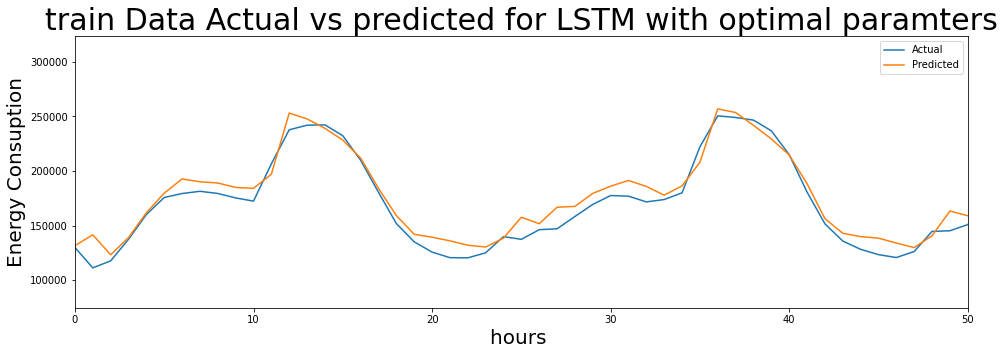

In [74]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_LSTM1_optimal,label="Actual")
plt.plot(y_pred_train_LSTM_optimal1,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for LSTM with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for LSTM1 model with optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

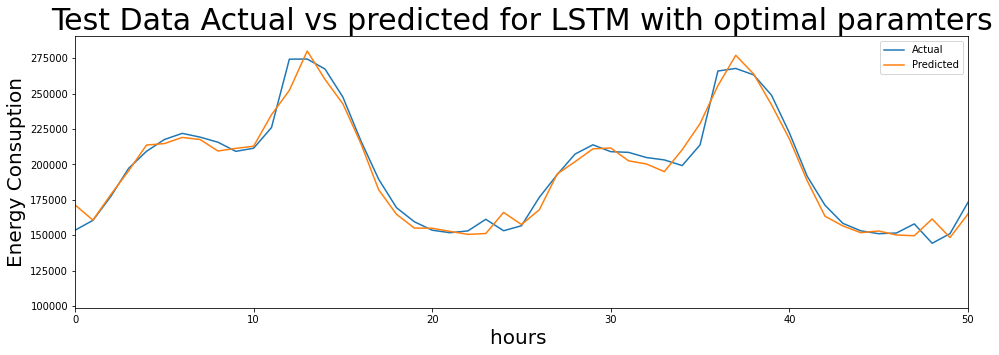

In [75]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_LSTM1_optimal,label="Actual")
plt.plot(y_pred_test_LSTM_optimal1,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for LSTM with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for LSTM model with optimal parameters on test data the Predicted results are not smooth and have a little fluctaions

### RNN model with optimal paramters

(0.0, 50.0)

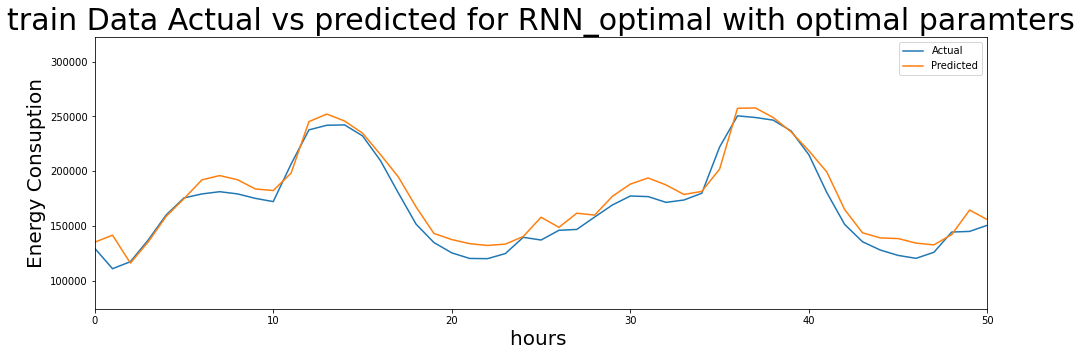

In [76]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN_optimal,label="Actual")
plt.plot(y_pred_train_RNN_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model with optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

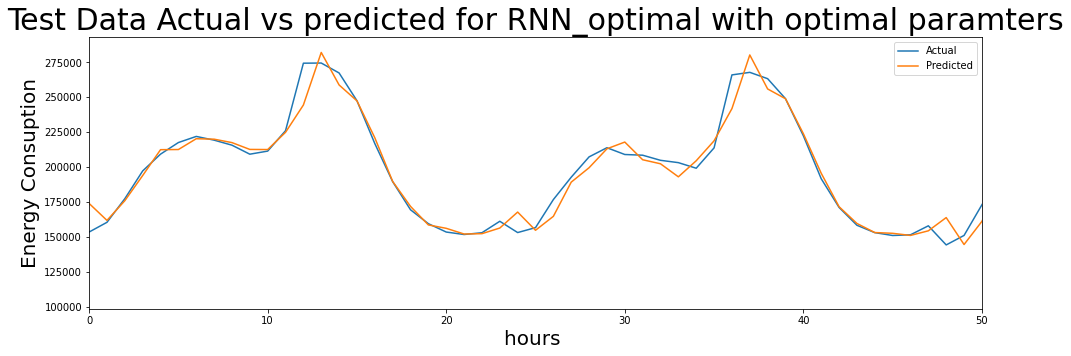

In [77]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN_optimal,label="Actual")
plt.plot(y_pred_test_RNN_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model with optimal parameters on test data the Predicted results are not smooth and have a some differnce

### GRU model with optimal paramters

(0.0, 50.0)

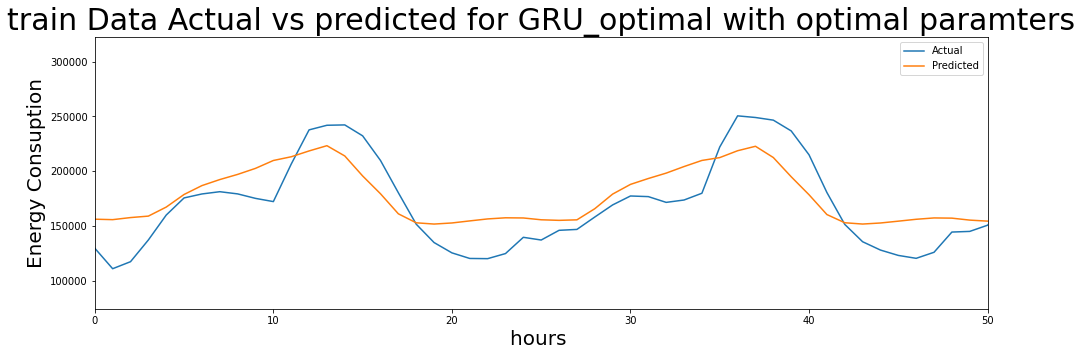

In [78]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_GRU_optimal,label="Actual")
plt.plot(y_pred_train_GRU_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for GRU_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for GRU model with optimal parameters on train data the Predicted results are not smooth and have a lot of deviations errors

(0.0, 50.0)

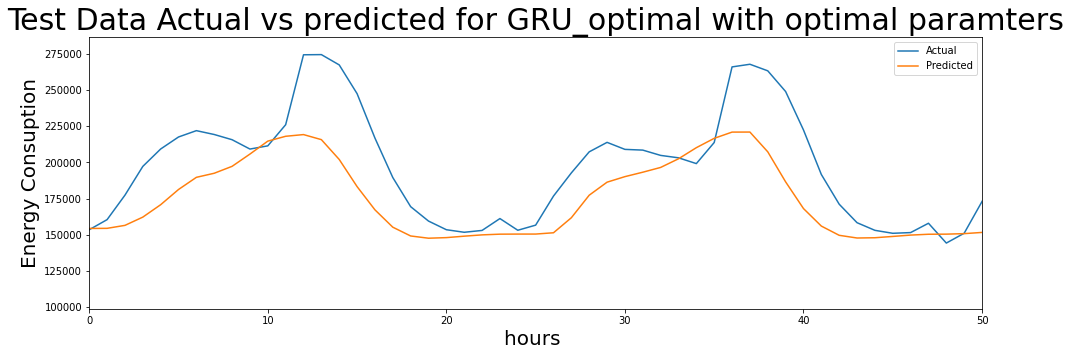

In [79]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_GRU_optimal,label="Actual")
plt.plot(y_pred_test_GRU_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for GRU_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for GRU model with optimal parameters on test data the Predicted results major difference

### Biderectional LSTM model without optimal paramters

(0.0, 50.0)

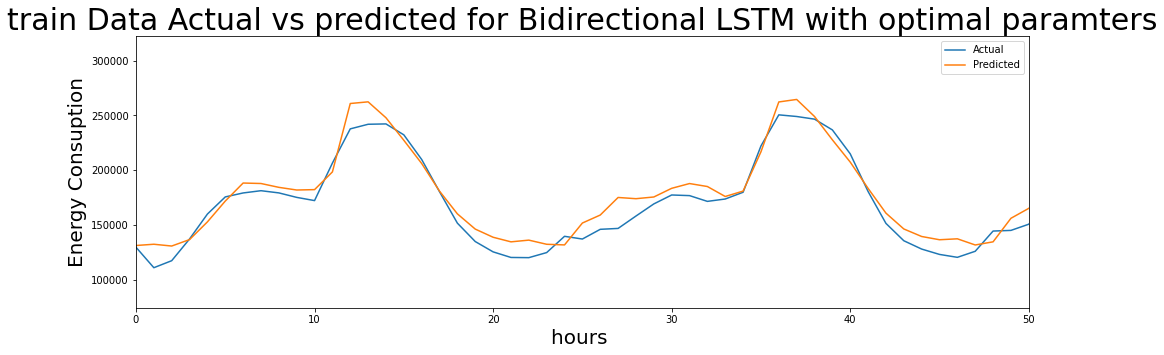

In [80]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_Bidirection_optimal,label="Actual")
plt.plot(y_pred_train_Bidirectional_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for Bidirectional LSTM with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for Biderctiona LSTM1 model with optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

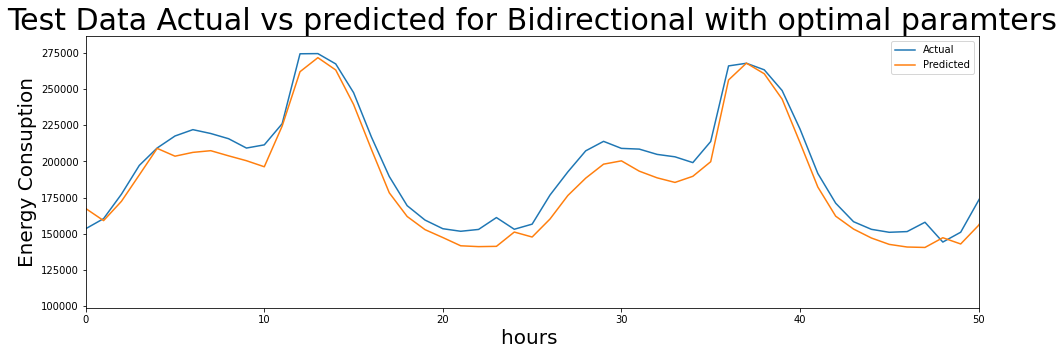

In [81]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_Bidirection_optimal,label="Actual")
plt.plot(y_pred_test_Bidirectional_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for Bidirectional with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for this model with optimal parameters on test data the Predicted results are not smooth and have a little fluctaions

### RNN model with attention layer and without optimal paramters

(0.0, 50.0)

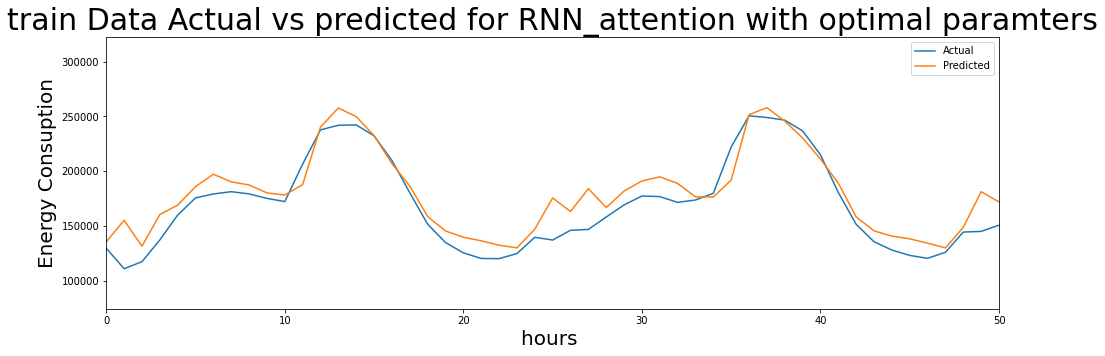

In [82]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN_attention_optimal,label="Actual")
plt.plot(y_pred_train_RNN_attention_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN_attention with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN model with attention layer without optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

(0.0, 50.0)

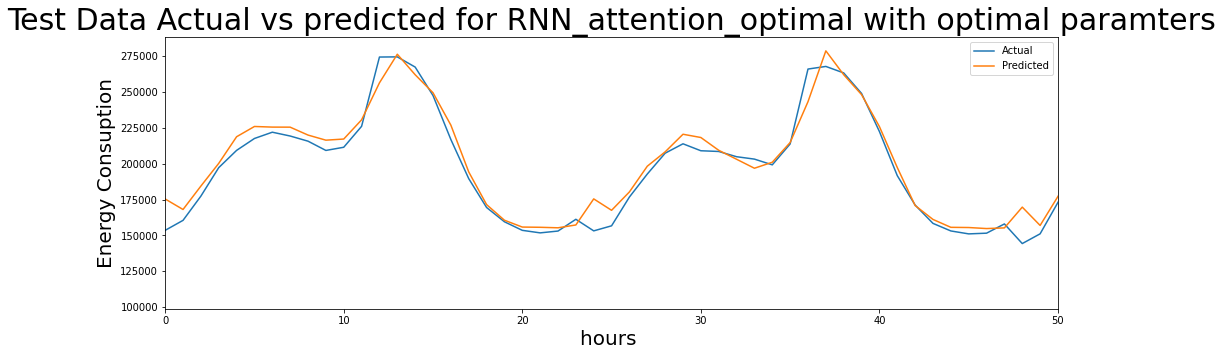

In [83]:
plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN_attention_optimal,label="Actual")
plt.plot(y_pred_test_RNN_attention_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN_attention_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

for RNN_attention model with optimal parameters on test data the Predicted results are not smooth and have a some differnce

## Combine output plot of models without optimal parameters 

(0.0, 50.0)

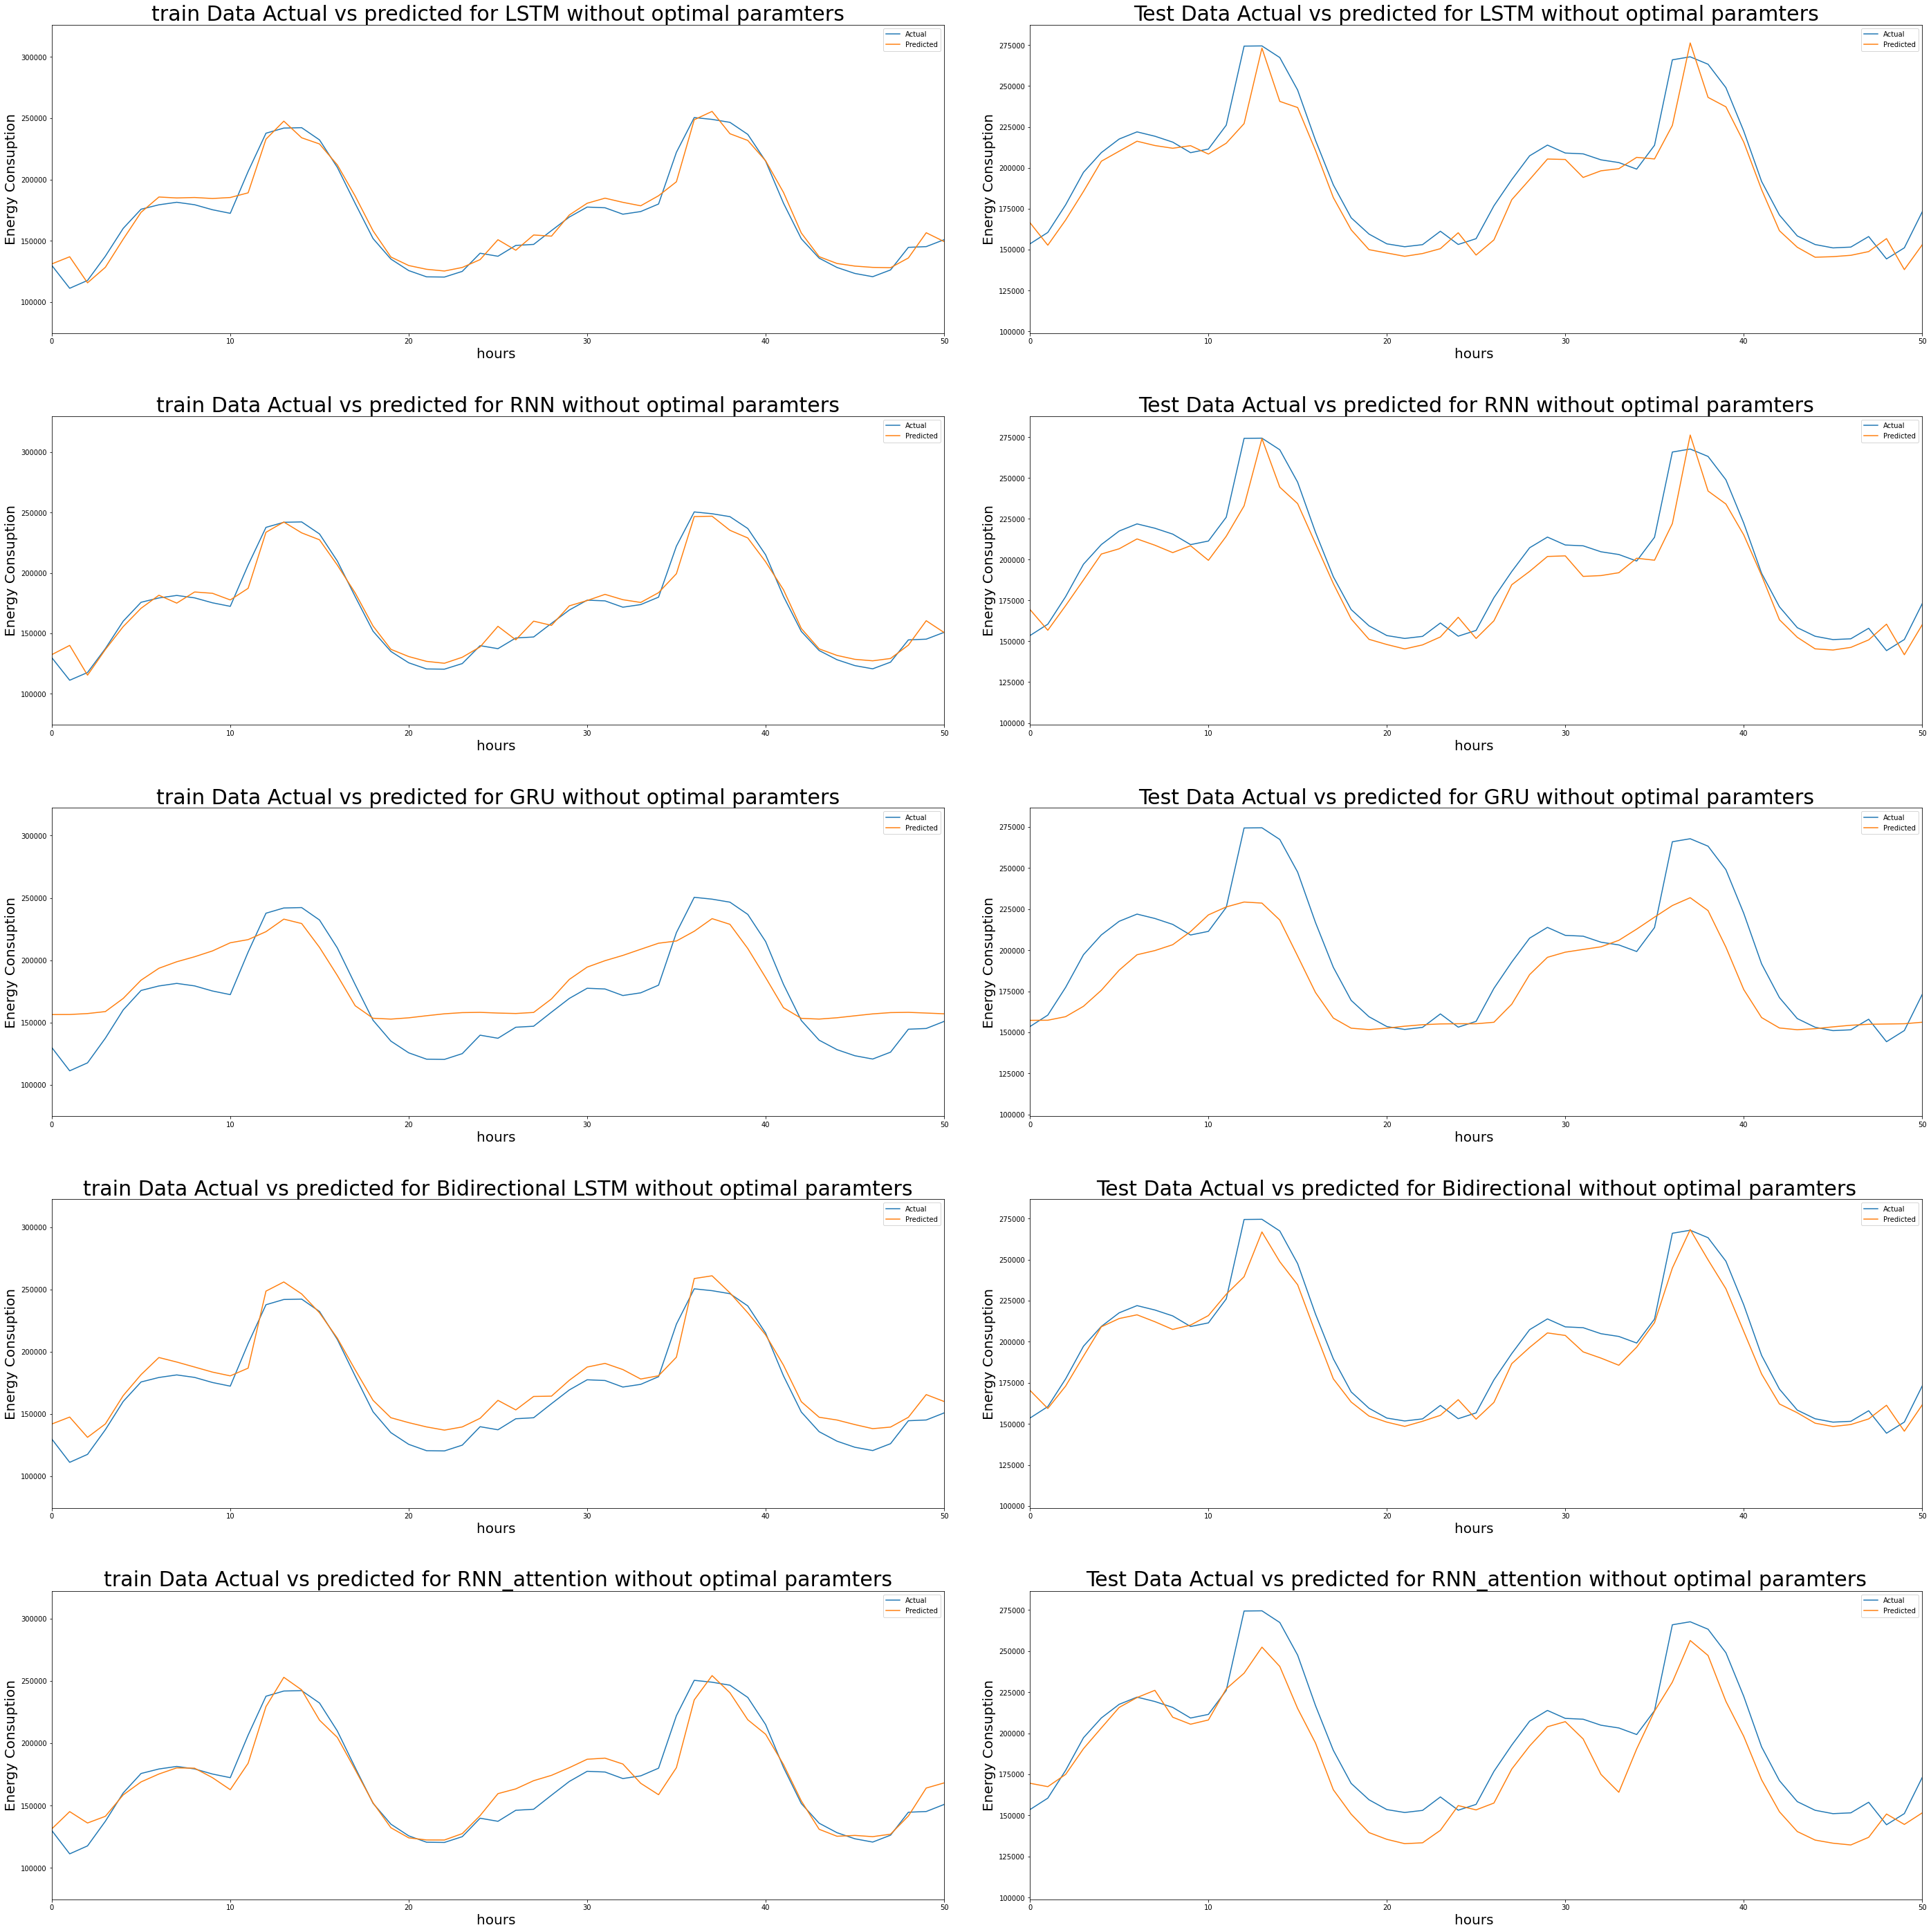

In [84]:
## Plots of  models without optimal parameters

### LSTM1 model without optimal paramters
plt.figure(figsize = (40,40)) 
plt.subplot(5, 2, 1)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_LSTM1,label="Actual")
plt.plot(y_pred_train_LSTM1,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

plt.subplot(5, 2, 2)
plt.tight_layout(pad=5.0)
# for LSTM1 model without optimal parameters on t data the Predicted results are smooth and have a minor fluctaions
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_LSTM1,label="Actual")
plt.plot(y_pred_test_LSTM1,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for LSTM model without optimal parameters on test data the Predicted results are not smooth and have a little fluctaions


### RNN model without optimal paramters
plt.subplot(5, 2, 3)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN,label="Actual")
plt.plot(y_pred_train_RNN,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN model without optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

plt.subplot(5, 2, 4)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN,label="Actual")
plt.plot(y_pred_test_RNN,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN model without optimal parameters on test data the Predicted results are not smooth and have a some differnce

### GRU model without optimal paramters
plt.subplot(5, 2, 5)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_GRU,label="Actual")
plt.plot(y_pred_train_GRU,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for GRU without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for GRU model without optimal parameters on train data the Predicted results are not smooth and have a lot of deviations errors

plt.subplot(5, 2, 6)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_GRU,label="Actual")
plt.plot(y_pred_test_GRU,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for GRU without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for GRU model without optimal parameters on test data the Predicted results major difference

### Biderectional LSTM model without optimal paramters
plt.subplot(5, 2, 7)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_Bidirestional,label="Actual")
plt.plot(y_pred_train_Bidirectional,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for Bidirectional LSTM without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for Biderctiona LSTM1 model without optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

plt.subplot(5, 2, 8)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_Bidirestional,label="Actual")
plt.plot(y_pred_test_Bidirectional,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for Bidirectional without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for this model without optimal parameters on test data the Predicted results are not smooth and have a little fluctaions

### RNN model with attention layer and without optimal paramters
plt.subplot(5, 2, 9)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN_attention,label="Actual")
plt.plot(y_pred_train_RNN_attention,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN_attention without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN model with attention layer without optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

plt.subplot(5, 2, 10)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN_attention,label="Actual")
plt.plot(y_pred_test_RNN_attention,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN_attention without optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN_attention model without optimal parameters on test data the Predicted results are not smooth and have a some differnce

If we see overall on training data the precitions overall seem much smoother as compared to test data

## Comined output plot of models with optimal parameters

(0.0, 50.0)

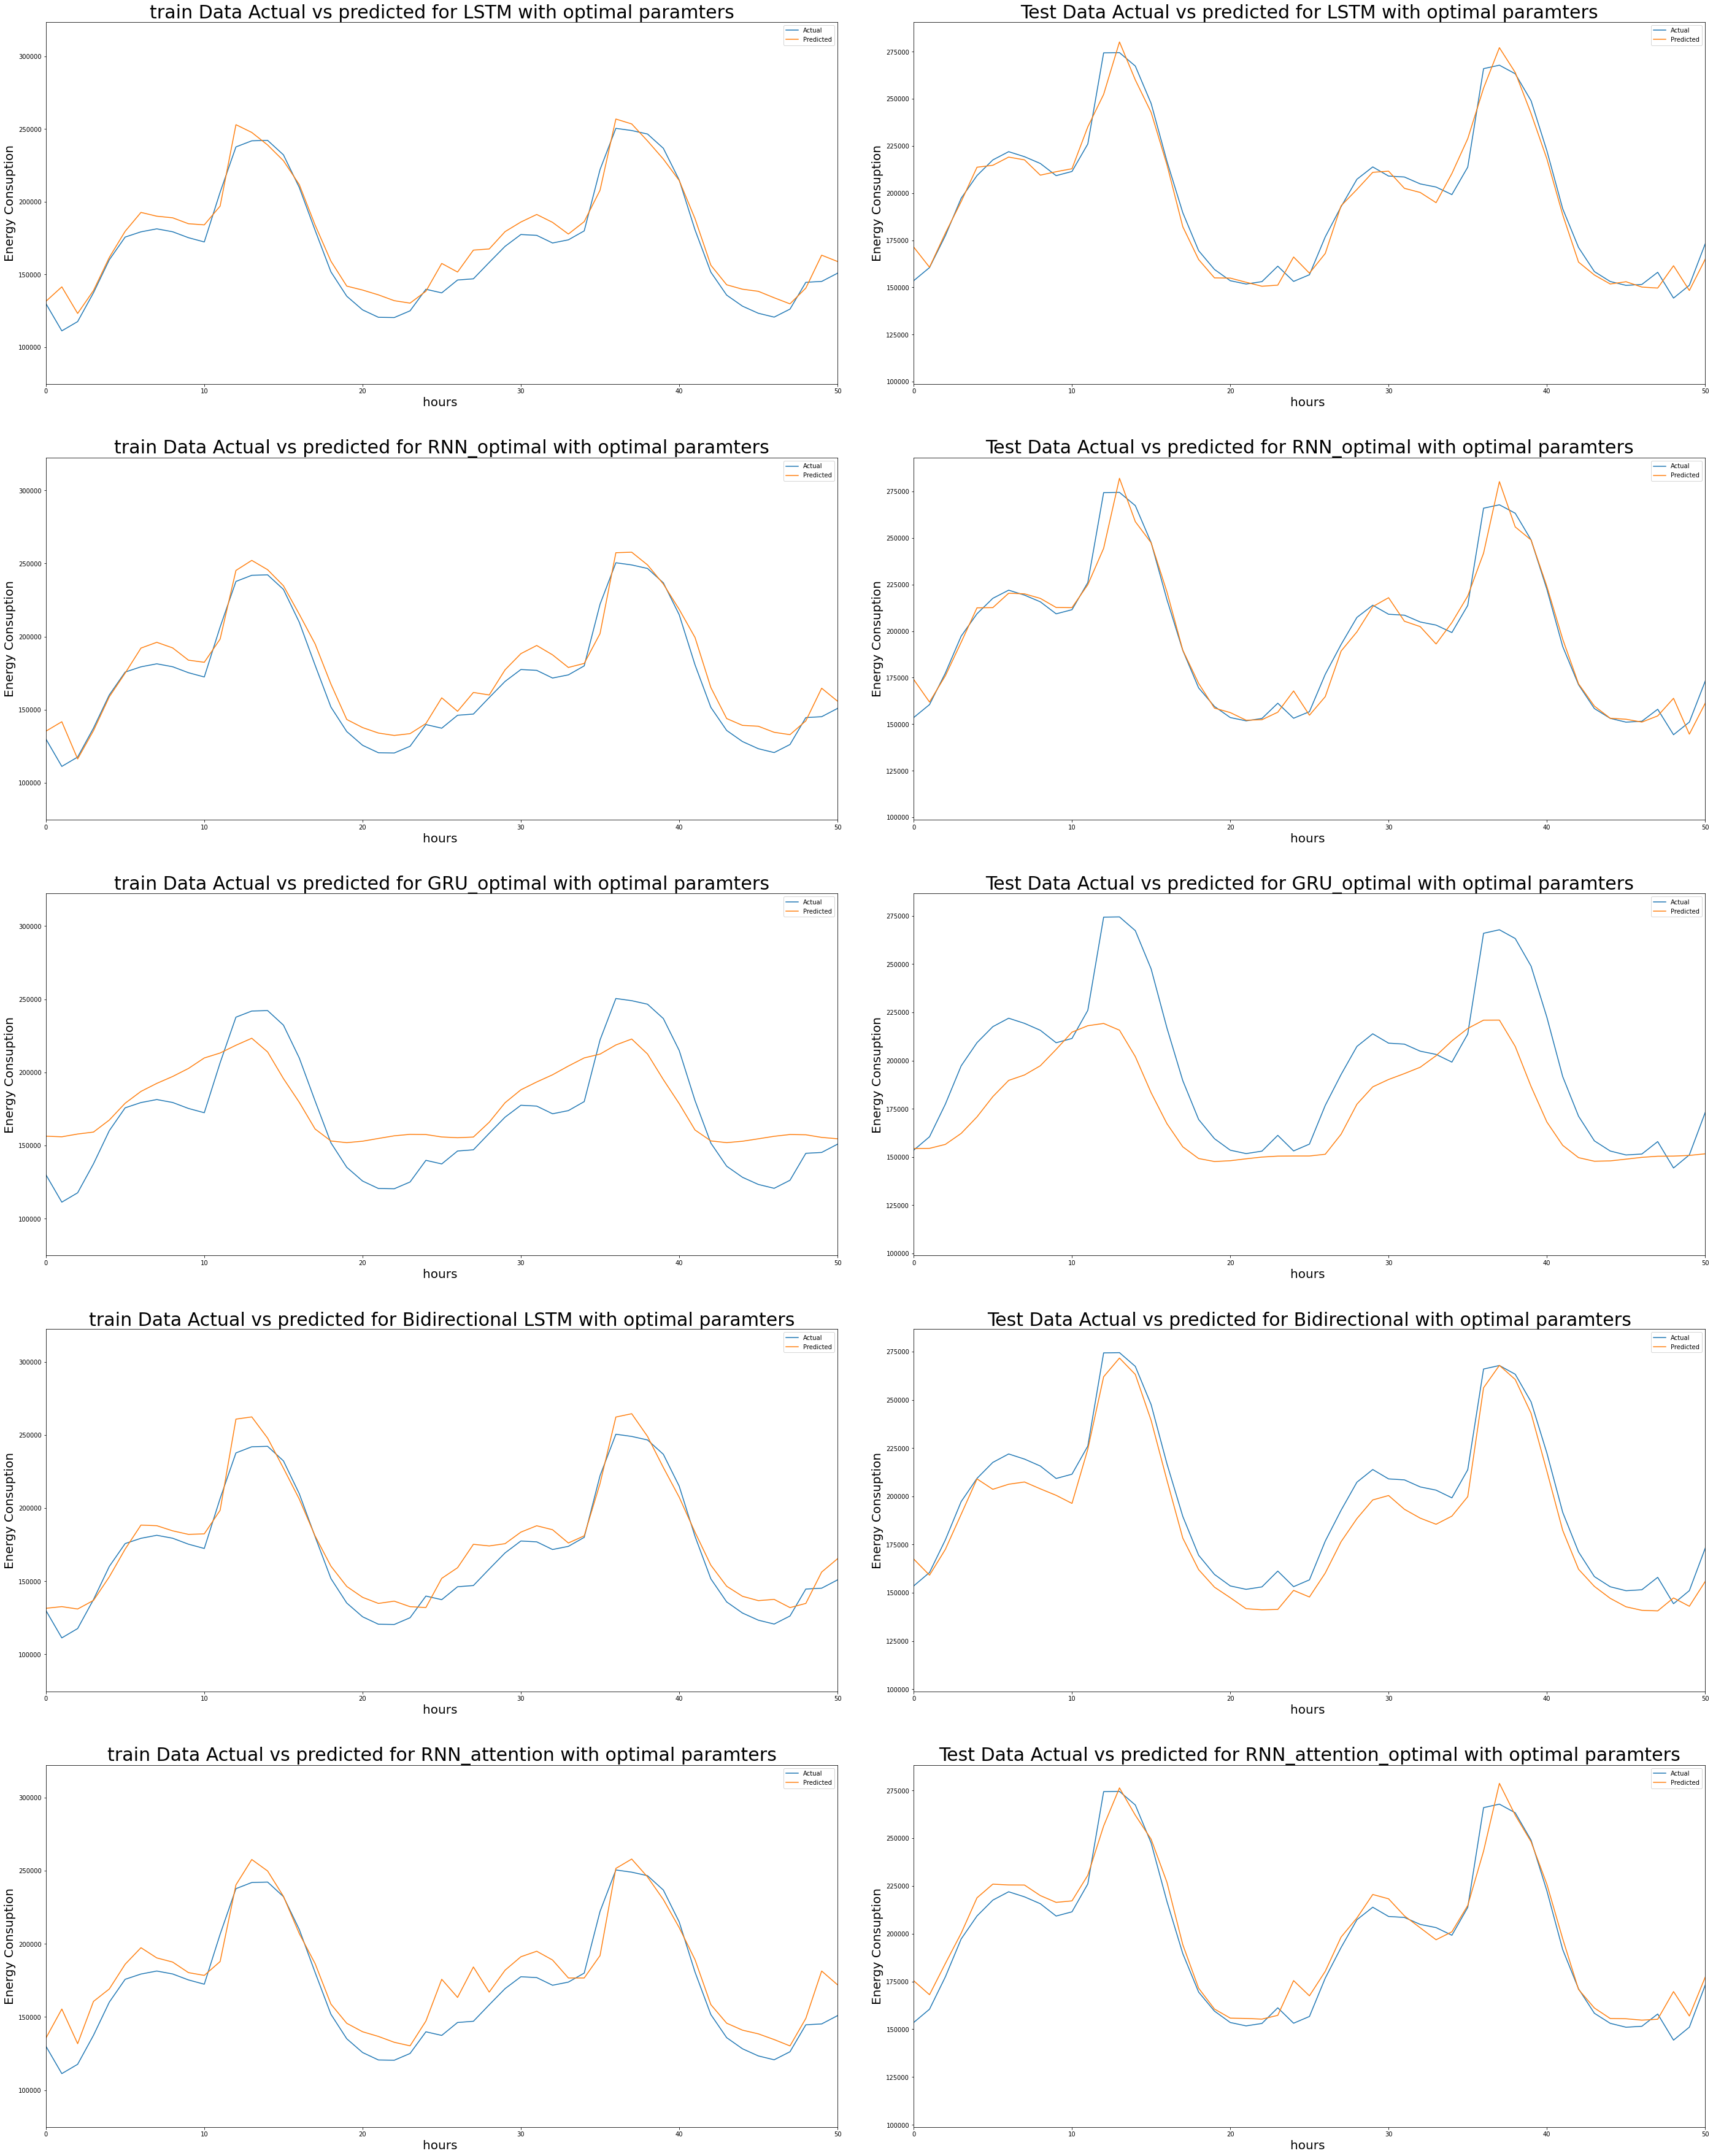

In [85]:
## Plots of  models with optimal parameters

### LSTM1 model with optimal paramters
plt.figure(figsize = (40,50)) 
plt.subplot(5, 2, 1)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_LSTM1_optimal,label="Actual")
plt.plot(y_pred_train_LSTM_optimal1,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for LSTM with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])

plt.subplot(5, 2, 2)
plt.tight_layout(pad=5.0)
# for LSTM1 model with optimal parameters on t data the Predicted results are smooth and have a minor fluctaions
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_LSTM1_optimal,label="Actual")
plt.plot(y_pred_test_LSTM_optimal1,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for LSTM with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for LSTM model with optimal parameters on test data the Predicted results are not smooth and have a little fluctaions


### RNN model with optimal paramters
plt.subplot(5, 2, 3)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN_optimal,label="Actual")
plt.plot(y_pred_train_RNN_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN model with optimal parameters on t data the Predicted results are smooth and have a minor fluctaions

plt.subplot(5, 2, 4)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN_optimal,label="Actual")
plt.plot(y_pred_test_RNN_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN model with optimal parameters on test data the Predicted results are not smooth and have a some differnce

### GRU model with optimal paramters
plt.subplot(5, 2, 5)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_GRU_optimal,label="Actual")
plt.plot(y_pred_train_GRU_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for GRU_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for GRU model with optimal parameters on train data the Predicted results are not smooth and have a lot of deviations errors

plt.subplot(5, 2, 6)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_GRU_optimal,label="Actual")
plt.plot(y_pred_test_GRU_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for GRU_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for GRU model with optimal parameters on test data the Predicted results major difference

### Biderectional LSTM model without optimal paramters
plt.subplot(5, 2, 7)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_Bidirection_optimal,label="Actual")
plt.plot(y_pred_train_Bidirectional_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for Bidirectional LSTM with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for Biderctiona LSTM1 model with optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

plt.subplot(5, 2, 8)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_Bidirection_optimal,label="Actual")
plt.plot(y_pred_test_Bidirectional_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for Bidirectional with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for this model with optimal parameters on test data the Predicted results are not smooth and have a little fluctaions

### RNN model with attention layer and without optimal paramters
plt.subplot(5, 2, 9)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_train_RNN_attention_optimal,label="Actual")
plt.plot(y_pred_train_RNN_attention_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("train Data Actual vs predicted for RNN_attention with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN model with attention layer without optimal parameters on train data the Predicted results are smooth and have a minor fluctaions

plt.subplot(5, 2, 10)
plt.tight_layout(pad=5.0)
# plt.figure(figsize = (16,5))  
# plt.plot(df_1hr['Zone 1 Power Consumption'][-(48):])
plt.plot(y_test_RNN_attention_optimal,label="Actual")
plt.plot(y_pred_test_RNN_attention_optimal,label="Predicted")
plt.legend(loc="best")
plt.title("Test Data Actual vs predicted for RNN_attention_optimal with optimal paramters",fontsize=30 )
plt.xlabel('hours ', fontsize=20)
plt.ylabel('Energy Consuption', fontsize=20)
plt.xlim([0, 50])
# for RNN_attention model with optimal parameters on test data the Predicted results are not smooth and have a some differnce

If we see overall on training data the precitions overall seem much smoother as compared to test data

# Conclusions

## Actual vs predicted on training data

#### 1) When we applied models (RNN, LSTM. GRU, Bidirection-LSTM, RNN with attention layer) without optimal paramters it can be seen that the training results are lower than the test results of R2 scores and higher than the RMSE test scores respectively. This shows the problem of overfitting

#### 2) After we applied models (RNN, LSTM, Bidirection-LSTM, RNN with attention layer) with optimal paramters it can be seen that the training results are higher than the test results of R2 scores and lower than the RMSE test scores respectively. 

#### 3)  GRU model  gives results of overfitting both with optimal and non optimal parameters that is testing results has higher R2 scores

### On basis of training datasets results LSTM with optimal parameters gives best result with R2 score of 0.942122

### Hence we can say that the for optimal paramters training data of actual and predicted are very close and accuarte and have higher R2 while for non-optimal paramters models training data of actual and predicted is less accuarte and have lower R2 score 


### Seeing all the plots overall on training data the precitions  seem much smoother 

## Actual vs predicted on test data

#### 1) When we applied models (RNN, LSTM. GRU, Bidirection-LSTM, RNN with attention layer) without optimal paramters it can be seen that the testing results are high than the train results of R2 scores and lower than the RMSE train scores respectively. This shows the problem of overfitting

#### 2) After we applied models (RNN, LSTM, Bidirection-LSTM, RNN with attention layer) with optimal paramters it can be seen that the testing results are lower than the train results of R2 scores and high than the RMSE train scores respectively. 

#### 3)  GRU model  gives results of overfitting both with optimal and non optimal parameters that is testing results has hogher R2 scores

### On basis of testing datasets results LSTM without optimal parameters gives best result with R2 score of 0.942122

### Hence we can say that the for optimal paramters testing data of actual and predicted are very close and accuarte and have lower R2 while for non-optimal paramters models testing data of actual and predicted is less accuarte and have high R2 score

### Seeing all the plots overall on training data the precitions  seem less smoother 

## Optimal values of all hyperparameters of models

In [86]:
print('RNN model optila paramters: units: ', units_RNN, ' learning rate: ', learning_rate_RNN)

RNN model optila paramters: units:  50  learning rate:  0.01


In [87]:
print('LSTM model optila paramters: units: ', units_LSTM, ' learning rate: ', learning_rate_LSTM)

LSTM model optila paramters: units:  50  learning rate:  0.01


In [88]:
print('GRU model optila paramters: units: ', units_GRU, ' learning rate: ', learning_rate_GRU)

GRU model optila paramters: units:  90  learning rate:  0.001


# End